<a href="https://colab.research.google.com/github/samaneh-m/TU-deep-Learning/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fachprojekt Reinforcement Learning - Deep Learning 101
Authors: Marc Höftmann, Jan Robine

🔹***Task:*** Train a convolutional neural network (CNN) to classify images on the [CIFAR-10 dataset](https://paperswithcode.com/dataset/cifar-10). Fill in the missing code!

---

**Setup with Google Colab:** Access it via their [website](https://colab.research.google.com/).

- Don't let the notebook disconnect during training! This happens when you close the browser tab, or when you lose the internet connection. You are automatically disconnected when the notebook has been running for more than 12 hours. More information on Colab's resource limits can be found [here](https://research.google.com/colaboratory/faq.html#resource-limits).
- When you are **ready** to train the CNN, change the runtime type of this notebook to "GPU":  
"Runtime > Change runtime type" ("Laufzeit > Laufzeittyp ändern"). To save resources, only switch to "GPU" when you are finished with your implementation.
- You need to upload the $\texttt{helper.py}$-file into your runtime environment to be able to import from it. Uncomment the following code cell and select the file to upload it.

In [ ]:
# from google.colab import files
# uploaded = files.upload()

**Setup at home:** Install these python libraries.
- Use our `requirements.txt` or install

1. `torch`, `torchvision`  for training neural networks. Get it [here](https://pytorch.org/). Select CUDA for GPU support (usable with **Nvidia** GPUs). Use ROCm for AMD.
2. `matplotlib` for visualizations

---

## Imports

In [ ]:
import matplotlib.pyplot as plt
from helper import *

# Deep learning library
import torch
import torchvision
from torchvision.transforms import GaussianBlur

# Use shorthands (nn instead of torch.nn, optim instead of torch.optim)
from torch import nn, optim

## Download CIFAR-10 and visualization
🔹***Task:*** Run the code. It downloads the dataset (170MB) into directory "data" and shows some images.

In [ ]:
# Normalize the images from [0, 1] to [-1, 1].
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Load the training dataset (for training)
training_data = torchvision.datasets.CIFAR10(
    root="data", train=True, download=True, transform=transform)

# Load the test dataset (for evaluation)
test_data = torchvision.datasets.CIFAR10(
    root="data", train=False, download=True, transform=transform)

plot_cifar10_grid(training_data, test_data, sample_count=32, nrow=8, padding=2, figsize=(12, 8))

---

##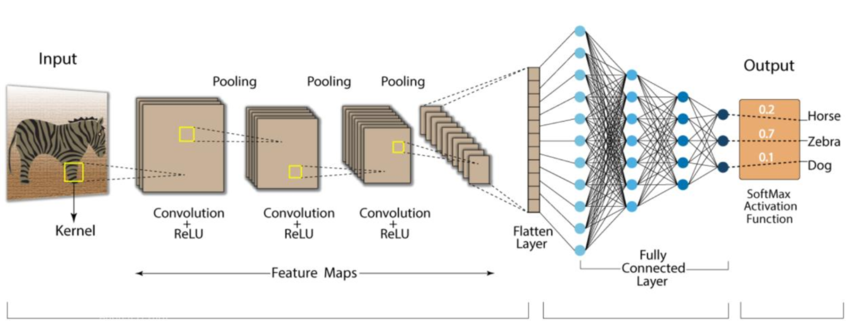 Convolutional Neural Networks (CNNs)

**General CNN architecture:**

**Input**: One or multiple 2D images with tensor shape `(batch_size, color_channels, height, width)`. For CIFAR-10: `(batch_size, 3, 32, 32)`.

1. Use convolutional layers (`nn.Conv2d`) to process an image. With each Conv2d create equal-sized or smaller feature maps. Follow each convolutional layer with an activation function (e.g. `nn.ReLU`).

    Feature Maps Shape: `(batch_size, c, h, w)`. Note that `c, h, w` can change after every convolutional layer.

2. Flatten each 3D feature map into one dimension using `nn.Flatten`.

    Flatten Shape: `(batch_size, c*h*w)`.

3. Use fully connected layers (`nn.Linear`) to create an output. Follow each fully connected layer with an activation function (e.g. `nn.ReLU`).

    Output Shape: `(batch_size, number_of_image_classes)`.

More information on PyTorch layers can be found in the [documentation](https://pytorch.org/docs/stable/nn.html).  

**🔍 Hints:**
- Fully connected layers (`nn.Linear`) with alot units are expensive to train. Do not use more than `512` for a layer.

- Don't forget activation functions after `nn.Conv2d` or `nn.Linear`. But not after the output.

- Big networks get (usually) better results! But they need more compute time. Start with a small network for debugging.

🔹***Task:*** Add the missing code.

In [ ]:
class CNN(nn.Module):

  def __init__(self):
    super().__init__()
    ################################################
    # Use nn.Sequential() to build your network. Name the network "self.cnn = ...".
    # TODO

    ################################################

  def forward(self, imgs):
    '''
    Arguments:
      imgs torch.Tensor: images of shape (batch_size, 3, 32, 32).
    Returns:
      torch.Tensor: predictions of shape (batch_size, 10).
    '''
    ################################################
    # Use the network you built in __init__() to compute the scores of the input images.
    # TODO

    ################################################

  def predict(self, imgs):
    '''
    Arguments:
      imgs torch.Tensor: images of shape (batch_size, 3, 32, 32).
    Returns:
      torch.Tensor: predicted class indices of shape (batch_size).
    '''
    ################################################
    # Use the network to predict a class for each image.
    # Apply torch.argmax() on the output scores to get the predictions.
    # TODO

    ################################################

## Test the network class

🔔 **Important:**

When you change your neural network above, make sure to run the code cell again, before running the cell below!  
Otherwise the old neural network code will be used.

🔹***Task:*** Run the code to check if your neural network functions are correct. Your network design from `__init__()` is not checked.

In [ ]:
cnn_test = CNN().eval()
ok = check_network(cnn_test, input_shape=(3, 32, 32), num_classes=10)

# Hyperparameters
Hyperparameters decide how well our network can learn. These are (mostly) numbers that are set **before** training and must be carefully tuned to achieve optimal learning performance. For our CNN, we look at the following:

| Hyperparameter  | 🔍 **Description** | 🚀 **Low Value**  | 🎯 **Optimal Value**  | 🔥 **High Value**  |
|----------------|-------------------|--------------------------|------------------------------|--------------------------|
| **Learning Rate** | Controls the neural network learning speed. | 🐢 Slow learning. May get stuck in sub-optimal performance. | ✅ Good learning speed, avoids instability. | ⚡ Fast but unstable learning. Network might forget already learned concepts. |
| **Batch Size** | Number of images seen before one learning step is done. | 🎯 Noisy learning, slower training but sometimes better generalization. | ✅ Efficient training with good generalization. | 🚀 Stable updates, faster training, but may generalize poorly. |
| **Optimizer** | Algorithm (e.g. SGD, Adam) that updates neural networks to minimize loss. | ⏳ **SGD:** Slower training but stable, sometimes better generalization. | ✅ Find the best optimizer! | ⚡ **Adam:** Faster training, adaptive learning, but sometimes may not generalize well. |
| **Epochs** | Number of times the entire dataset is seen by the network during training. | 📉 Underfitting, model stops learning too early, poor performance. | ✅ Learns patterns without overfitting. | 🎭 Overfitting, memorizes noise, poor generalization. |
| **Model Width** | Number of neurons per hidden layer. | 🔹 Limited capacity. Struggles with finding complex patterns. | ✅ Enough neurons to learn complexity while preventing overfitting. | 🔥 Higher capacity, captures complex features, but risk of overfitting & higher computation cost. |
| **Model Depth** | Number of hidden layers. | 🏗️ Too shallow. Struggles with finding complex patterns. | ✅ Sufficient depth to discover patterns without training instability. | 🌊 More expressive, but harder to train and possible memorization of training images. |


📌 Very rough possible values for some hyperparameters.
- `learning_rate` $\in [10^{-6}, 1]$. The best learning rate changes for each optimizer.
- `batch_size` $\in [1, 1024]$
- `optimizer` $\in [\texttt{SGD},\texttt{RMSProp},\texttt{Adam},\texttt{AdamW}]$

🔹***Task:*** Set values for the hyperparameters below. Finding good values is not so easy, because they can **influence each other**!

In [ ]:
# create the network
network = CNN()

################################################
# Try to find the best hyperparameters for the following three values.
# Your CNN is also a hyperparameter. You can build it in any way you want.
# TODO

################################################

epochs = 10 # Every student should (only) train for 10 epochs.

## Compute the loss function from scratch!
The **cross-entropy loss** is the most common loss function for classification.  


Given:
- **Predictions:** A batch of unnormalized values from the neural network:

  $Z \in \mathbb{R}^{N \times C}$ where:
  - $N$ is the batch size
  - $C$ is the number of classes
- **Labels:** A vector of **true class indices**:

  $Y \in \{0, 1, \dots, C-1\}^N$

---

### Softmax Function and Cross-Entropy Loss (Naive)

First, we define the softmax function which calculates class probabilities, where $ i,j \in \{0, 1, \dots, C-1\} $ are class indices.

$$
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=0}^{C-1} e^{z_j}}
$$

Now, the cross-entropy loss for a **single** data point with **label** $ y \in \{0, 1, \dots, C-1\} $ is:

$$
\mathcal{L_{\text{CE}}} = -\log \left( \text{softmax}(z_y) \right) = -\log \left( \frac{e^{z_y}}{\sum_{j=0}^{C-1} e^{z_j}} \right)
$$

🔹***Task:*** Implement this loss formulation. We consider a batch of data, so compute the **mean** over all loss values in this batch!

🔍 **Hint:** Useful functions are `torch.exp`, `torch.sum`, `torch.arange`, `torch.log`, `torch.mean`

Look into the [documentation](https://pytorch.org/docs/stable/torch.html) for a detailed function explanation. On the website, there is a searchbar at the top left.

In [ ]:
def cross_entropy_loss_naive(predictions, labels):
    '''
    Arguments:
      predictions torch.Tensor: predictions from the network's forward pass of shape (batch_size, 10).
      labels torch.Tensor: true class indices of shape (batch_size). data type: torch.long

    Returns:
      torch.Tensor: single loss value of shape (1).
    '''
    ################################################
    # Compute the cross-entropy loss using the naive implementation.
    # TODO

    ################################################

# test your implementation
test_cross_entropy_value(cross_entropy_loss_naive)

# Improve the loss function

The naive cross entropy loss is **numerically unstable** because $e^{z_j}$ can overflow in float32 for large $z_j$.

First, we see that the following equality holds by considering logarithm rules:
$$
\mathcal{L} = -\log \left( \frac{e^{z_y}}{\sum_{j=0}^{C} e^{z_j}} \right) = \log \left( \sum_{j=0}^{C} e^{z_j} \right) - z_y
$$

To stabilize, we subtract the maximum value in each row, to stop overflow in float32.

Let:
$$
z' = z - \max_j z_j
$$

Then use the **log-sum-exp trick**. By considering logarithm and exponential rules we can easily see that this equality holds:

$$
\log \left( \sum_{j=0}^{C-1} e^{z_j} \right) = \max_j z_j + \log \left( \sum_{j=0}^{C-1} e^{z_j - \max_j z_j} \right)
$$

So the stable and efficient implementation for cross-entropy loss becomes:

$$
\mathcal{L} = \log \left( \sum_{j=0}^{C-1} e^{z_j - \max_j z_j} \right) - (z_y - \max_j z_j)
$$

Which also simplifies to:

$$
\mathcal{L} = \log \left( \sum_{j=0}^{C-1} e^{z_j - \max_j z_j} \right) - z_y + \max_j z_j
$$

🔹***Task:*** Implement the stable computation for the cross entropy loss.

🔍 **Hint:** Useful functions are `torch.max`, `torch.exp`, `torch.sum`, `torch.arange`, `torch.log`, `torch.mean`

Look into the [documentation](https://pytorch.org/docs/stable/torch.html) for a detailed function explanation. On the website, there is a searchbar at the top left.

In [ ]:
def cross_entropy_loss_stable(predictions, labels):
    '''
    Arguments:
      predictions torch.Tensor: unnormalized values from the network's forward pass of shape (batch_size, 10).
      labels torch.Tensor: true class indices of shape (batch_size). dtype: torch.long

    Returns:
      torch.Tensor: single loss value of shape (1).
    '''
    ################################################
    # Compute the cross entropy loss using the numerically stable version of the softmax function.
    # TODO

    ################################################

# test your implementation
test_cross_entropy_value(cross_entropy_loss_stable)

## CNN Optimization
In order to optimize the CNN we have to do the following:

Given: images, labels

1. Compute the outputs of the neural network. Don't use predict().
2. Compute the cross-entropy loss with your own implementation.
3. Compute the gradients for the loss function.
4. Update the network by using the optimizer.
5. Reset the gradients by using the optimizer.

🔹***Task:*** Implement the function below and build the dataloaders.

In [ ]:
################################################
# Create the train and test data loader.
# Enable num_workers=4 and persistent_workers for faster data loading.
# Also, shuffle the training data.
# TODO

################################################

def training_step(network, images, labels, optimizer):
    """
    Args:
        network (torch.nn.Module): The neural network.
        images (torch.Tensor): Input batch of images with shape (batch_size, 3, 32, 32).
        labels (torch.Tensor): Corresponding labels for the images with shape (batch_size).
        optimizer (torch.optim.Optimizer): Optimizer for updating neural network weights.

    Returns:
        torch.Tensor: a single loss value for the current batch with shape (1). When returning, apply .detach() on the loss value.
    """
    ################################################
    # Do a forward pass, loss computation, backward pass, optimizer step and gradient zeroing.
    # TODO

    ################################################

## Let's Go. Everything is done. Run the train function below. 🏋️

To pass this homework, you need to achieve an accuracy of **at least 69%**! Try out, or research on the internet how to build and train neural networks properly. There are some **design choices** to consider!

**Our best solution with a big and good architecture and well-tuned hyperparameters gets 80.5% (after 10 epochs) and trains in Google Colab with a T4 GPU about 4 minutes.**

Can you beat us? How good can you train your network with only 10 epochs? 🚀

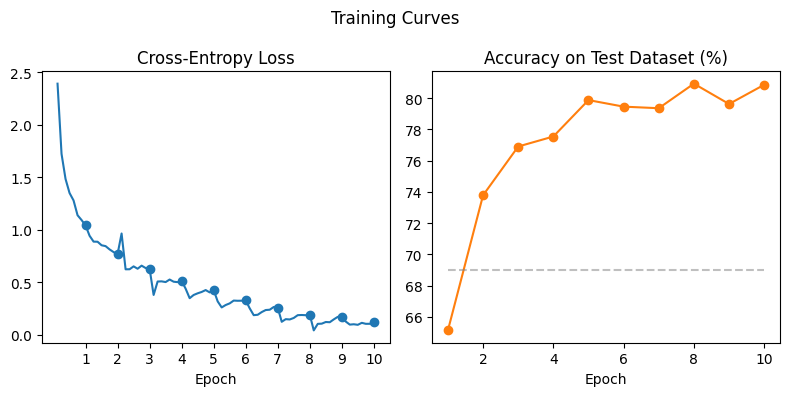


In [ ]:
train_network(network, training_step, training_loader, test_loader, optimizer, epochs, baseline=69)

# Visualization
The computation that our neural networks do are hard to understand.
But we can look at the weights that directly operate on the raw pixel. Here we should see some interesting patterns.

- (Optional) If you want to see nice-looking edge detectors here, use `kernel_size=7` in the first convolutional layer. Use this kernel size **not** to get best performance.

🔹***Task:*** Run the code below.

In [ ]:
visualize_conv1_filters(network)

# Hallucinations
It is possible to create hallucinated images for each class. These images are not in the dataset and will look better when your network reaches high test accuracy.

🔹***Task:*** Run the code below. **You get a different result each time**.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
images = generate_images_for_all_classes(network.to(device), device , training_data.classes)

# Good job!

You are done!